# download brightness temperature
- using the data from laura that I downloaded with the brightness temperature script 
- download data in terminal 
- to get different days, have to change the script 

## downloads

In [1]:
import os
import awscli as aws
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date 
from datetime import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely import geometry


import matplotlib.pyplot as plt
import xarray 
import scipy.stats as ss 
import metpy  
import os
import h5py    
from pyhdf import SD
from mpl_toolkits.basemap import Basemap
import colormap
import time
import calendar
import h5pyd
from matplotlib.patches import Polygon
from netCDF4 import Dataset # Import the NetCDF Python interface


## import files 
OR_ABI-L2-MCMIPC-M3_G16_s20181781922189_e20181781924562_c20181781925075.nc

OR - Indicates the system is operational

ABI - Instrument type

L2 - Level 2 Data

MCMIP - Multichannel Cloud and Moisture Imagery products

c - CONUS file (created every 5 minutes).

M3 - Scan mode

G16 - GOES-16

sYYYYJJJHHMMSSZ - Scan start: 4 digit year, 3 digit day of year (Julian day), hour, minute, second, tenth second

eYYYYJJJHHMMSSZ - Scan end

cYYYYJJJHHMMSSZ - File Creation .nc - NetCDF file extension

In [2]:
# data/edworak/202118205/OR_ABI-L2-MCMIPF-M6_G17_s20211820520320_e20211820529392_c20211820529542.nc
path = '/data/edworak/BT/202118120'
list_names = os.listdir(path)
print(list_names) 

['OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812030321_e20211812039399_c20211812039542.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812000321_e20211812009394_c20211812009542.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812040321_e20211812049394_c20211812049540.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812010321_e20211812019388_c20211812019541.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812050321_e20211812059399_c20211812059540.nc']


In [3]:
FILE = '/data/edworak/BT/202118120/OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc'
# FILE = path + file_names[i]
data = xarray.open_dataset(FILE)

goes_data = data['CMI_C07'][:]
goes_data

<xarray.DataArray 'CMI_C07' (y: 5424, x: 5424)>
[29419776 values with dtype=float32]
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.1518 0.1518 0.1517 0.1517 ... -0.1517 -0.1518 -0.1518
  * x        (x) float32 -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  14
    valid_range:            [    0 16383]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C07

## file name list 

In [4]:
# create empty array to add into 
folder_names_unsorted = []

path = '/data/edworak/BT'
folder = os.listdir(path)
#print(file)

for f in folder[1:]: 
    folder_names_unsorted.append(f)
folder_names = sorted(folder_names_unsorted)
folder_names

['202118120',
 '202118121',
 '202118122',
 '202118123',
 '202118200',
 '202118201',
 '202118202',
 '202118203',
 '202118204',
 '202118205',
 '202118206']

In [5]:
file_names_unsorted = []

for i in range(0, len(folder_names)): 
    path = '/data/edworak/BT/' + folder_names[i]
    #print(path)
    file = os.listdir(path)
    file_names_unsorted.append(file)
file_names = sorted(file_names_unsorted)
#file_names_unsorted[1]
file_names = [item for sublist in file_names_unsorted for item in sublist]
file_names

['OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812030321_e20211812039399_c20211812039542.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812000321_e20211812009394_c20211812009542.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812040321_e20211812049394_c20211812049540.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812010321_e20211812019388_c20211812019541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812050321_e20211812059399_c20211812059540.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812100321_e20211812109394_c20211812109541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812120319_e20211812129391_c20211812129541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812130319_e20211812139397_c20211812139542.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812110319_e20211812119391_c20211812119541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812140319_e20211812149391_c20211812149539.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812150319_e20211812159392_c20211812159541.nc',
 'OR_ABI-L2-MCMIPF-M6_G17_s20211812230319_e202118122

## make a map 

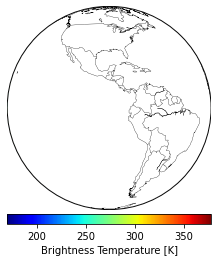

In [6]:
# Path to the GOES-R simulated image file
path = '/data/edworak/BT/202118120/OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc'
 
# Open the file using the NetCDF4 library
#nc = Dataset(path)

goes_data = xarray.open_dataset(path)
#R = goes_data['CMI_C02'][:]

# Extract the Brightness Temperature values from the NetCDF
data = goes_data['CMI_C07'][:] 

# created the Basemap reference with the satellite projection
bmap = Basemap(projection='geos', lon_0=-90.5, lat_0=0, satellite_height=35786023.0, ellps='GRS80')

# create the plot with a color gradient
bmap.imshow(data, origin='upper', vmin=170, vmax=378, cmap='jet')

#  lines configure the basemap, parallels and meridians appearance:
bmap.drawcoastlines(linewidth=0.3, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.3, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')

#  next line of code we have chosen the legend position and text:
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')

# with the last lines of code, we save the result in a PNG file called “GOES-16_Ch13.png” 
# with 300 DPI of resolution:
DPI = 300
# plt.savefig('C:\VLAB\GOES-16_Ch13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)


/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/tmp/ipykernel_410785/3310194162.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


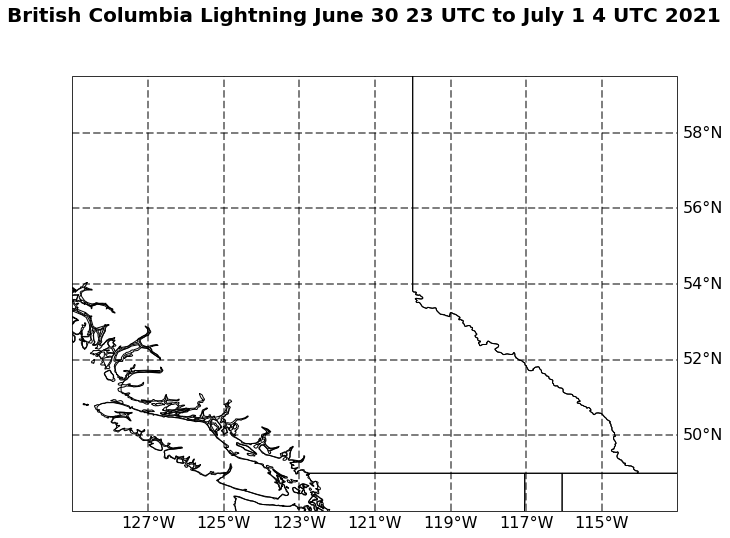

In [14]:

#for i in range(len(file_names)):
fig = plt.figure(figsize=(12, 8))

#plt.subplots(figsize=(20, 20)) 

FILE = '/data/edworak/BT/202118120/OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc'
# FILE = path + file_names[i]
data = xarray.open_dataset(FILE)
goes_string = str(data)
goes_data = data['CMI_C07'][:]

# ------------------------------------------------------------------------------------------------------

pc = ccrs.PlateCarree()

#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(1, 1, 1, projection=pc)
ax.set_extent([-129, -113, 48, 59.5], crs=pc)

ax.coastlines(resolution='50m', color='black', linewidth=1.0)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=1.0)

# scan_start = datetime.strptime(goes_data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
# plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M')), fontsize = 20) #loc='right'

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='black', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-127, -125, -123, -121, -119, -117, -115, -113])
gl.ylocator = mticker.FixedLocator([50,  52, 54, 56, 58])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'


#ax.imshow(goes_data, origin='upper', extent=(x.min(), x.max(), y.min(), y.max()), transform=geos, interpolation='none')
plt.imshow(goes_data, origin='upper',  interpolation='none', ax = ax)

#ax.contourf(goes_data)

plt.suptitle('British Columbia Lightning June 30 23 UTC to July 1 4 UTC 2021', fontweight='bold', fontsize=20, y = 1.0)
plt.tight_layout()

# plt.savefig("goes_fire_detect".format(scan_start.strftime('%d %B %Y %H:%M UTC ')), bbox_inches = "tight", dpi = 900)
plt.show()


## subplots

In [8]:
#for i in range(len(file_names)):
#plt.subplots(figsize=(10, 8))
fig = plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.05)

for i in range(0, len(folder_names)):
    for j in range(0, len(file_names), 6): 
    
        path = '/data/edworak/BT/' 
        FILE = path + folder_names[i] + str(file_names[j:j+6])
        goes_data = xarray.open_dataset(FILE)

        R = goes_data['CMI_C02'][:]
        G = goes_data['CMI_C03'][:]
        B = goes_data['CMI_C01'][:]

        # Apply range limits for each channel. RGB values must be between 0 and 1

        R = np.clip(R, 0, 1)
        G = np.clip(G, 0, 1)
        B = np.clip(B, 0, 1)
        #print(R)

        # Apply a gamma correction to the image to correct ABI detector brightness
        # takes everying in each array and raises it to 1/gamma 
        # control image so it isn't too dark 

        gamma = 2.2
        R = np.power(R, 1/gamma)
        G = np.power(G, 1/gamma)
        B = np.power(B, 1/gamma)
        #print(R)

        # Calculate the "True" Green
        # green "veggie" measures near-infared band sensitive to chlorophyll 
        # will tone down green to get a true green 

        G_true = 0.45 * R + 0.1 * G + 0.45 * B
        G_true = np.clip(G_true, 0, 1)  # apply limits again, just in case.


        # The RGB array for the true color image
        RGB = np.dstack([R, G_true, B])

        # We'll use the `CMI_C02` variable as a 'hook' to get the CF metadata.
        dat = goes_data.metpy.parse_cf('CMI_C01')

        geos = dat.metpy.cartopy_crs


        # We also need the x (north/south) and y (east/west) axis sweep of the ABI data
        x = dat.x
        y = dat.y

        #fig, axes = plt.subplots(3, 2)

        pc = ccrs.PlateCarree()
        #fig = plt.figure(figsize=(7, 6), edgecolor='k') 
        #ax = plt.subplot(2, 2, i + 1, projection=pc) # rows, columns
        ax = fig.add_subplot(2, 2, i + 1, projection=pc)
        ax.set_extent([-130, -100, 45, 65], crs=pc)

        scan_start = datetime.strptime(goes_data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
        plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), fontsize=18) # y = 0.95
        plt.tight_layout()               

        # Add the RGB image to the figure. The data is in the same projection as the
        # axis we just created.
        ax.imshow(RGB, origin='upper', extent=(x.min(), x.max(), y.min(), y.max()), transform=geos, interpolation='none')

        # Add Coastlines and States
        ax.coastlines(resolution='50m', color='black', linewidth=0.25)
        ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)


plt.show()

/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/xarray/backends/plugins.py:119: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/xarray/backends/plugins.py:119: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/xarray/backends/plugins.py:119: RuntimeWarning: 'scipy' fails w

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

<Figure size 720x576 with 0 Axes>